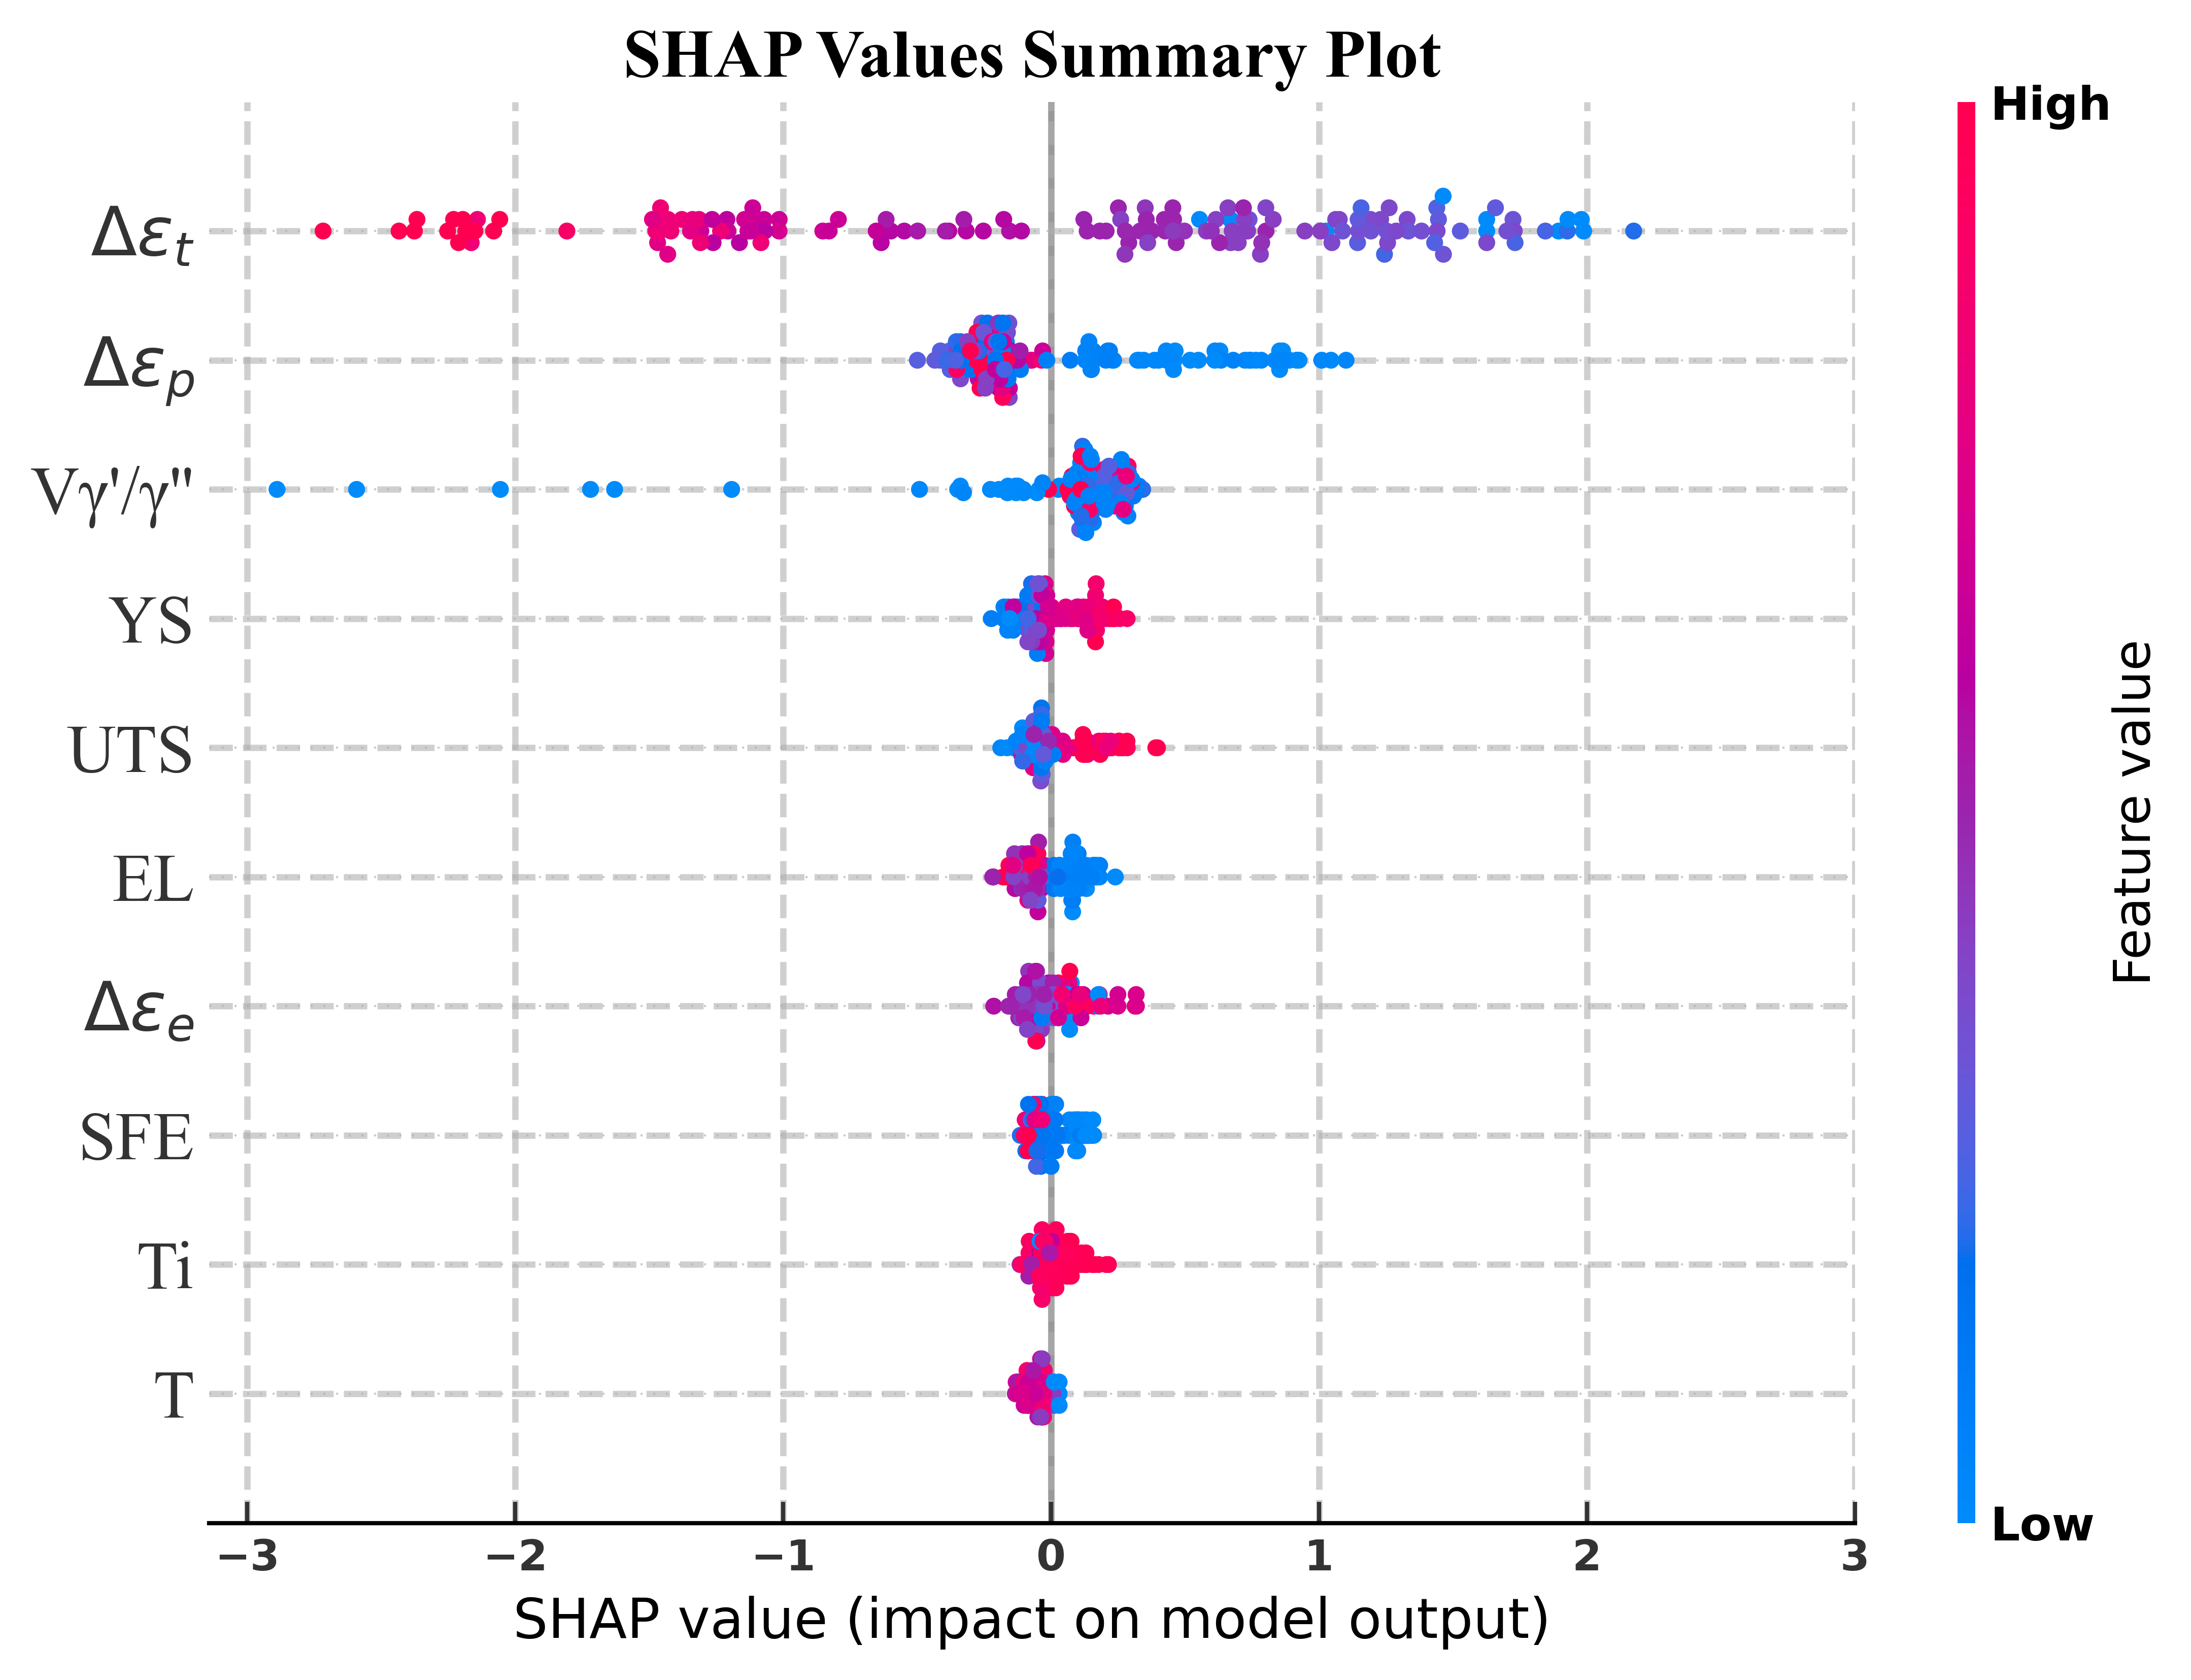

In [7]:
import numpy as np
import pandas as pd
import shap
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data
features = pd.read_excel('优化后数据.xlsx')
label1 = features['2Nf'].to_numpy()
label1 = label1 / 2
features = features.drop(['2Nf'], axis=1)
feature_names = features.columns  # Extract column names before conversion
features = MinMaxScaler().fit_transform(features)
label1 = np.log(label1)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, label1, test_size=0.25, random_state=42)

# Convert feature names to a list
feature_names_list = list(feature_names)

# Increase the weight of the 'T' feature
X_val_weighted = X_val.copy()  # Make a copy of the validation set

# Identify the index of the 'T' feature in the feature names list
t_feature_index = feature_names_list.index('T')

# Increase the values of the 'T' feature in the validation set
T_multiplier = 2  # Adjust this multiplier as needed
X_val_weighted[:, t_feature_index] *= T_multiplier

# Create the Random Forest model
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the weighted validation set
shap_values_weighted = explainer.shap_values(X_val_weighted)

# Modify feature names to include subscripts
feature_names_list_modified = []

for feature in feature_names_list:
    if feature == 'Δεt':
        feature_names_list_modified.append(r'$\Delta\epsilon_{t}$')
    elif feature == 'Δεe':
        feature_names_list_modified.append(r'$\Delta\epsilon_{e}$')
    elif feature == 'Δεp':
        feature_names_list_modified.append(r'$\Delta\epsilon_{p}$')
    else:
        feature_names_list_modified.append(feature)

# Set DPI globally
plt.rcParams['figure.dpi'] = 600

# Create a summary plot for the weighted SHAP values
weighted_summary_plot = shap.summary_plot(shap_values_weighted, X_val_weighted,
                                          feature_names=feature_names_list_modified,
                                          show=False, plot_type='dot', max_display=10)

# Set plot properties for the weighted summary plot
plt.title('SHAP Values Summary Plot', fontsize=16,
          fontweight='bold', fontname='Times New Roman')

# Set y-axis labels without bold
ax = plt.gca()
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16, fontweight=400, fontname='Times New Roman')

plt.xticks(np.arange(-3, 4, step=1), fontsize=10, fontweight='bold')
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(1)
plt.tick_params(axis='both', direction='in', length=5, width=1)
plt.rcParams["font.weight"] = "bold"
plt.grid(True, linestyle='--', alpha=0.6, linewidth=1.5)
plt.show()

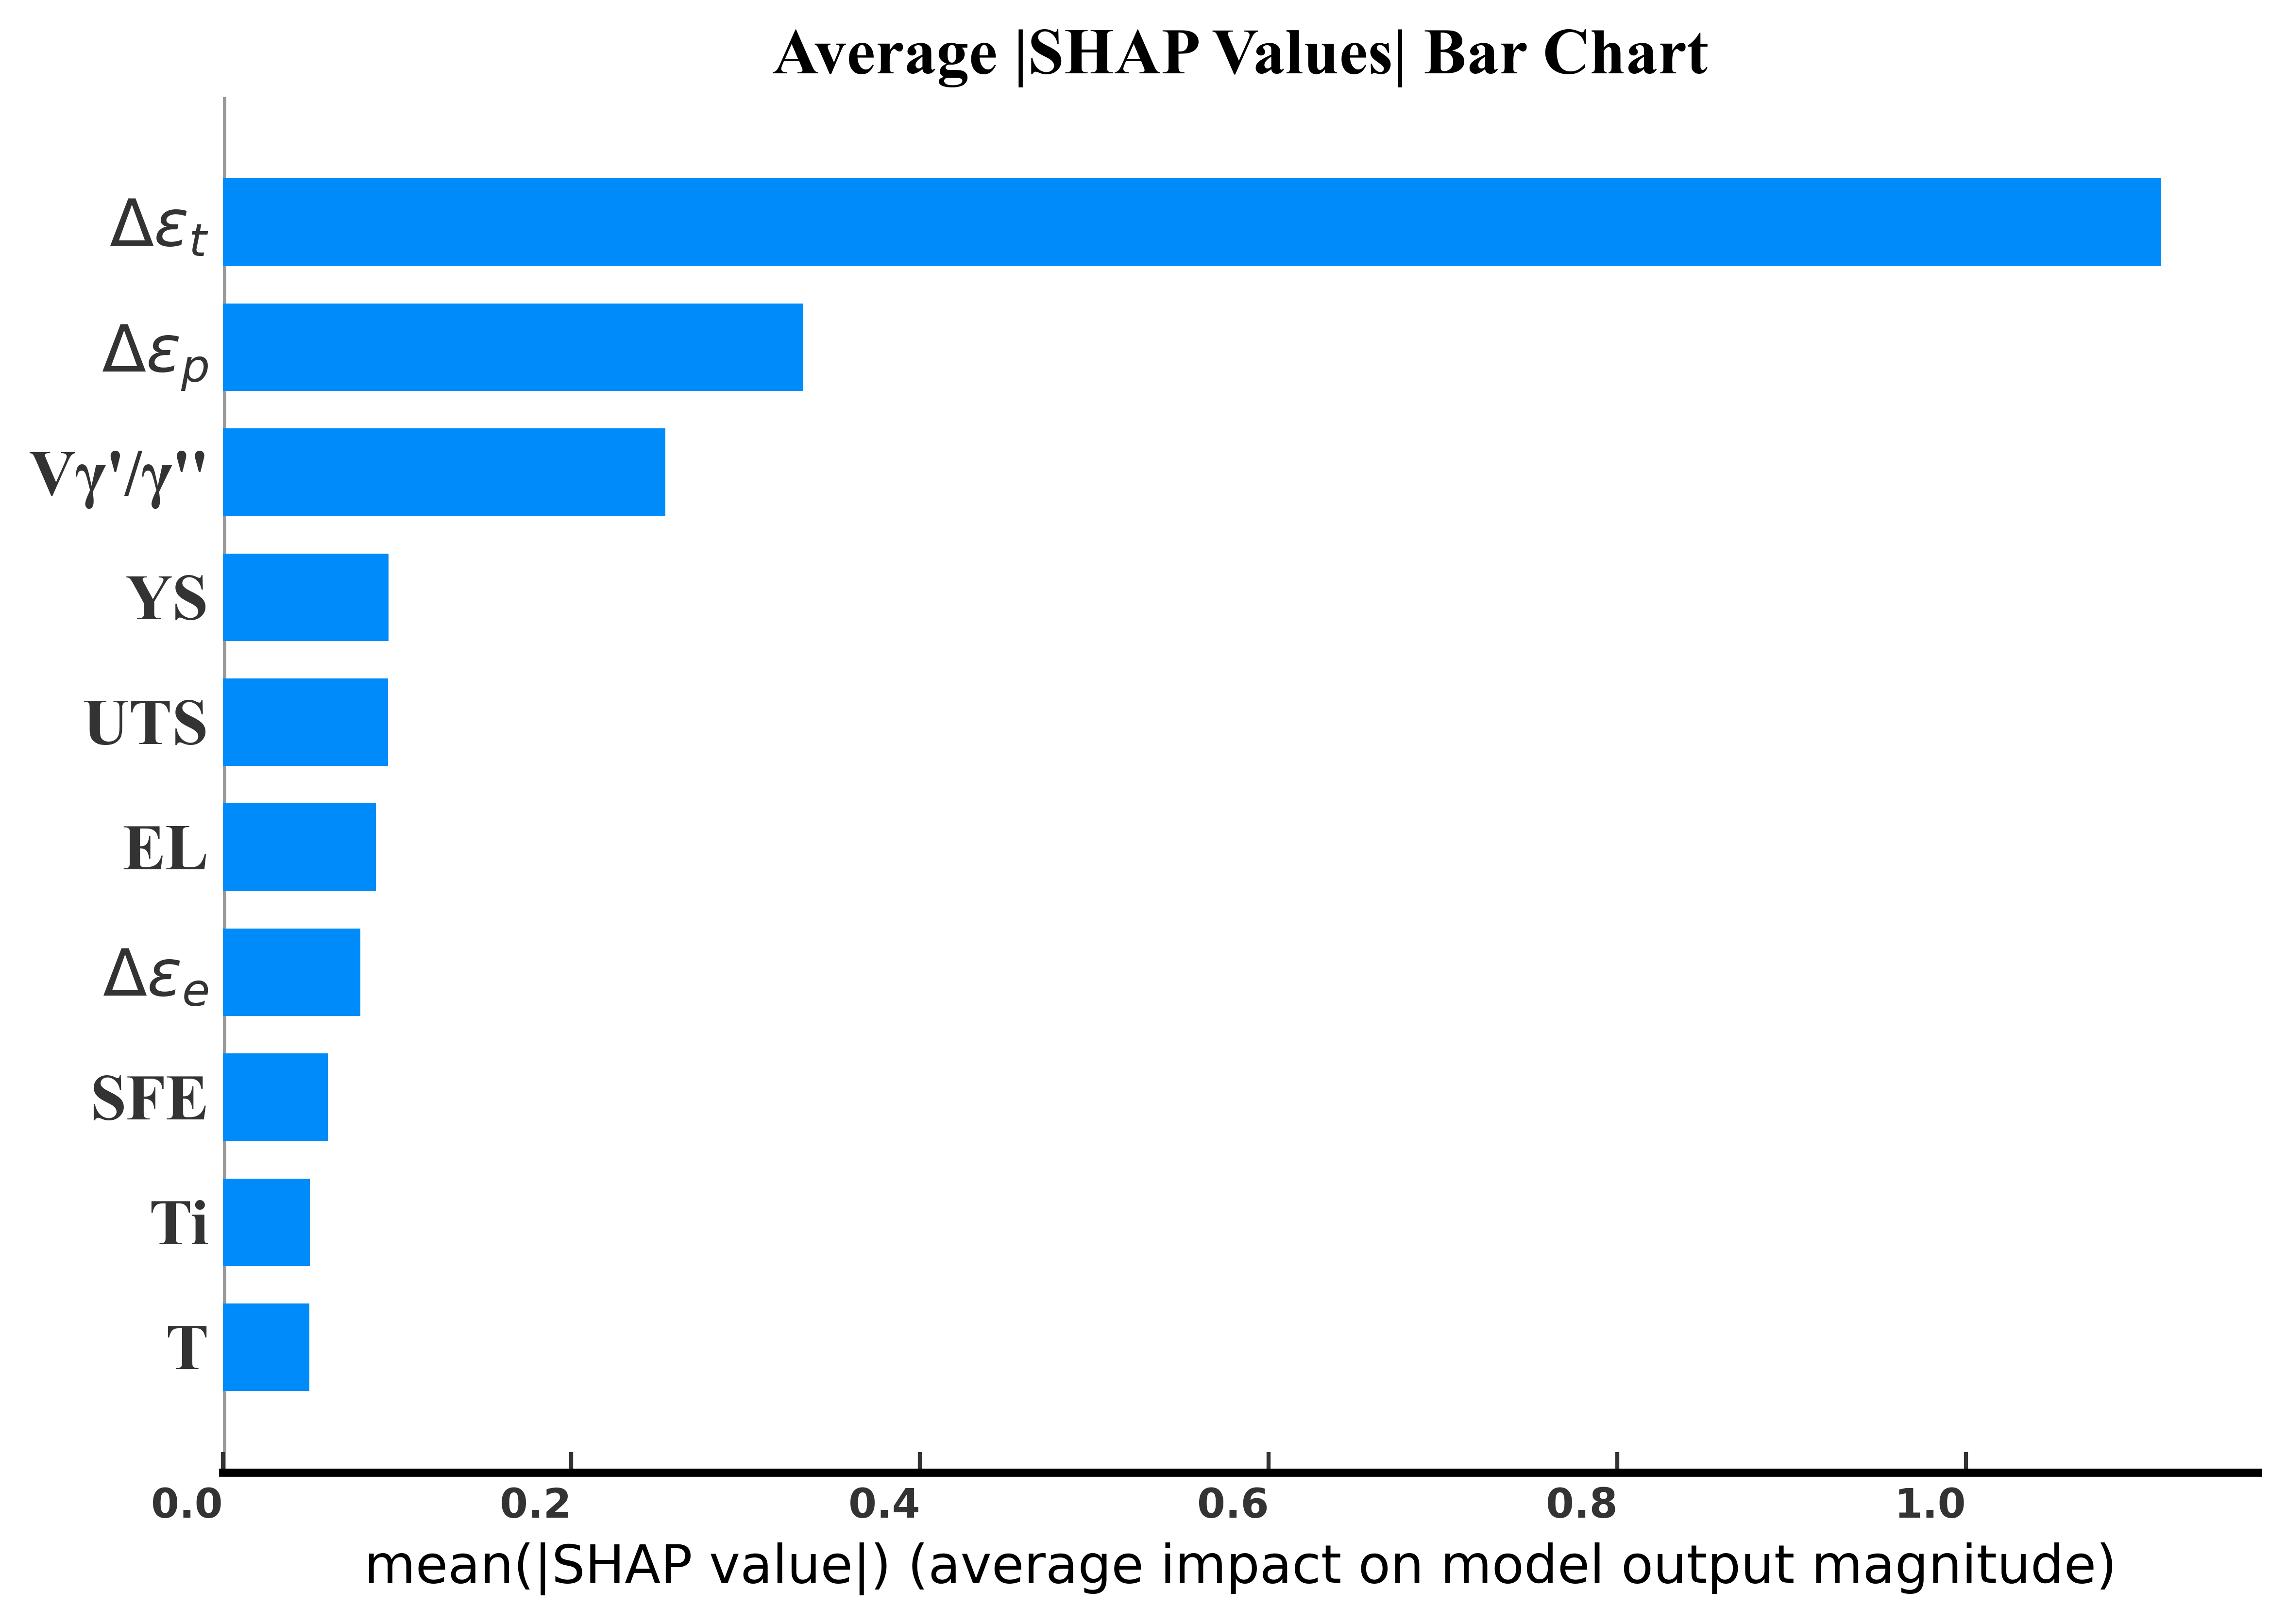

Feature values of top SHAP features in the validation set:
         Ni        Cr        Co        Fe        Al        Ti        Nb  \
0  0.923092  0.887198  0.750750  0.284866  0.218516  0.721229  0.183748   
1  0.384405  0.093389  0.675927  0.569519  0.041978  0.796656  0.314433   
2  0.297942  0.825289  0.847672  0.398373  0.672800  0.654743  0.179806   
3  0.217493  0.694823  0.472139  0.721004  0.029327  0.078538  0.456640   
4  0.303287  0.832809  0.159432  0.310467  0.207591  0.753110  0.312310   

         Mo         W         T  
0  0.047339  0.094173  1.510204  
1  0.116345  0.792035  0.775510  
2  0.347857  0.197175  1.693878  
3  0.612812  0.817344  0.000000  
4  0.486811  0.958995  1.489796  


In [8]:
import numpy as np
import pandas as pd
import shap
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data
features = pd.read_excel('优化后数据.xlsx')
label1 = features['2Nf'].to_numpy()
label1 = label1 / 2
features = features.drop(['2Nf'], axis=1)
feature_names = features.columns  

# Scale features and log-transform the label
features = MinMaxScaler().fit_transform(features)
label1 = np.log(label1)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, label1, test_size=0.25, random_state=42)

# Increase the weight of the 'T' feature
X_val_weighted = X_val.copy()   

# Convert feature_names to a list
feature_names_list = list(feature_names)

# Identify the index of the 'T' feature  
t_feature_index = feature_names_list.index('T')

# Increase the values of the 'T' feature  
T_multiplier = 2
X_val_weighted[:, t_feature_index] *= T_multiplier

# Create the Random Forest model
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the weighted validation set
shap_values_weighted = explainer.shap_values(X_val_weighted)

# Modify feature names  
feature_names_list_modified = []
for feature in feature_names_list:
    if feature == 'Δεt':
        feature_names_list_modified.append(r'$\Delta\epsilon_{t}$')
    elif feature == 'Δεe':  
        feature_names_list_modified.append(r'$\Delta\epsilon_{e}$')
    elif feature == 'Δεp':
        feature_names_list_modified.append(r'$\Delta\epsilon_{p}$')
    else:
        feature_names_list_modified.append(feature)

# Create a bar plot of average absolute SHAP values
plt.rcParams['figure.dpi'] = 600
shap.summary_plot(shap_values_weighted, X_val_weighted, 
                  feature_names=feature_names_list_modified,
                  plot_type="bar", max_display=10,
                  show=False)

# Set plot properties   
plt.title('Average |SHAP Values| Bar Chart', fontsize=16,  
          fontweight='bold', fontname='Times New Roman')   
plt.xticks(rotation=0, ha="right", fontsize=10, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold', fontname='Times New Roman')
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)    
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2)
plt.tick_params(axis='both', direction='in', length=5, width=1)
plt.rcParams["font.weight"] = "bold"
plt.show()

# Extract and display feature values of top features
top_features = feature_names_list_modified[:10]
top_feature_indices = [feature_names_list_modified.index(f) for f in top_features]

# Create a DataFrame to display the values
top_features_values = X_val_weighted[:, top_feature_indices]
df_top_features = pd.DataFrame(top_features_values, columns=top_features)

# Display the DataFrame
print("Feature values of top SHAP features in the validation set:")
print(df_top_features.head())

IndexError: list index out of range

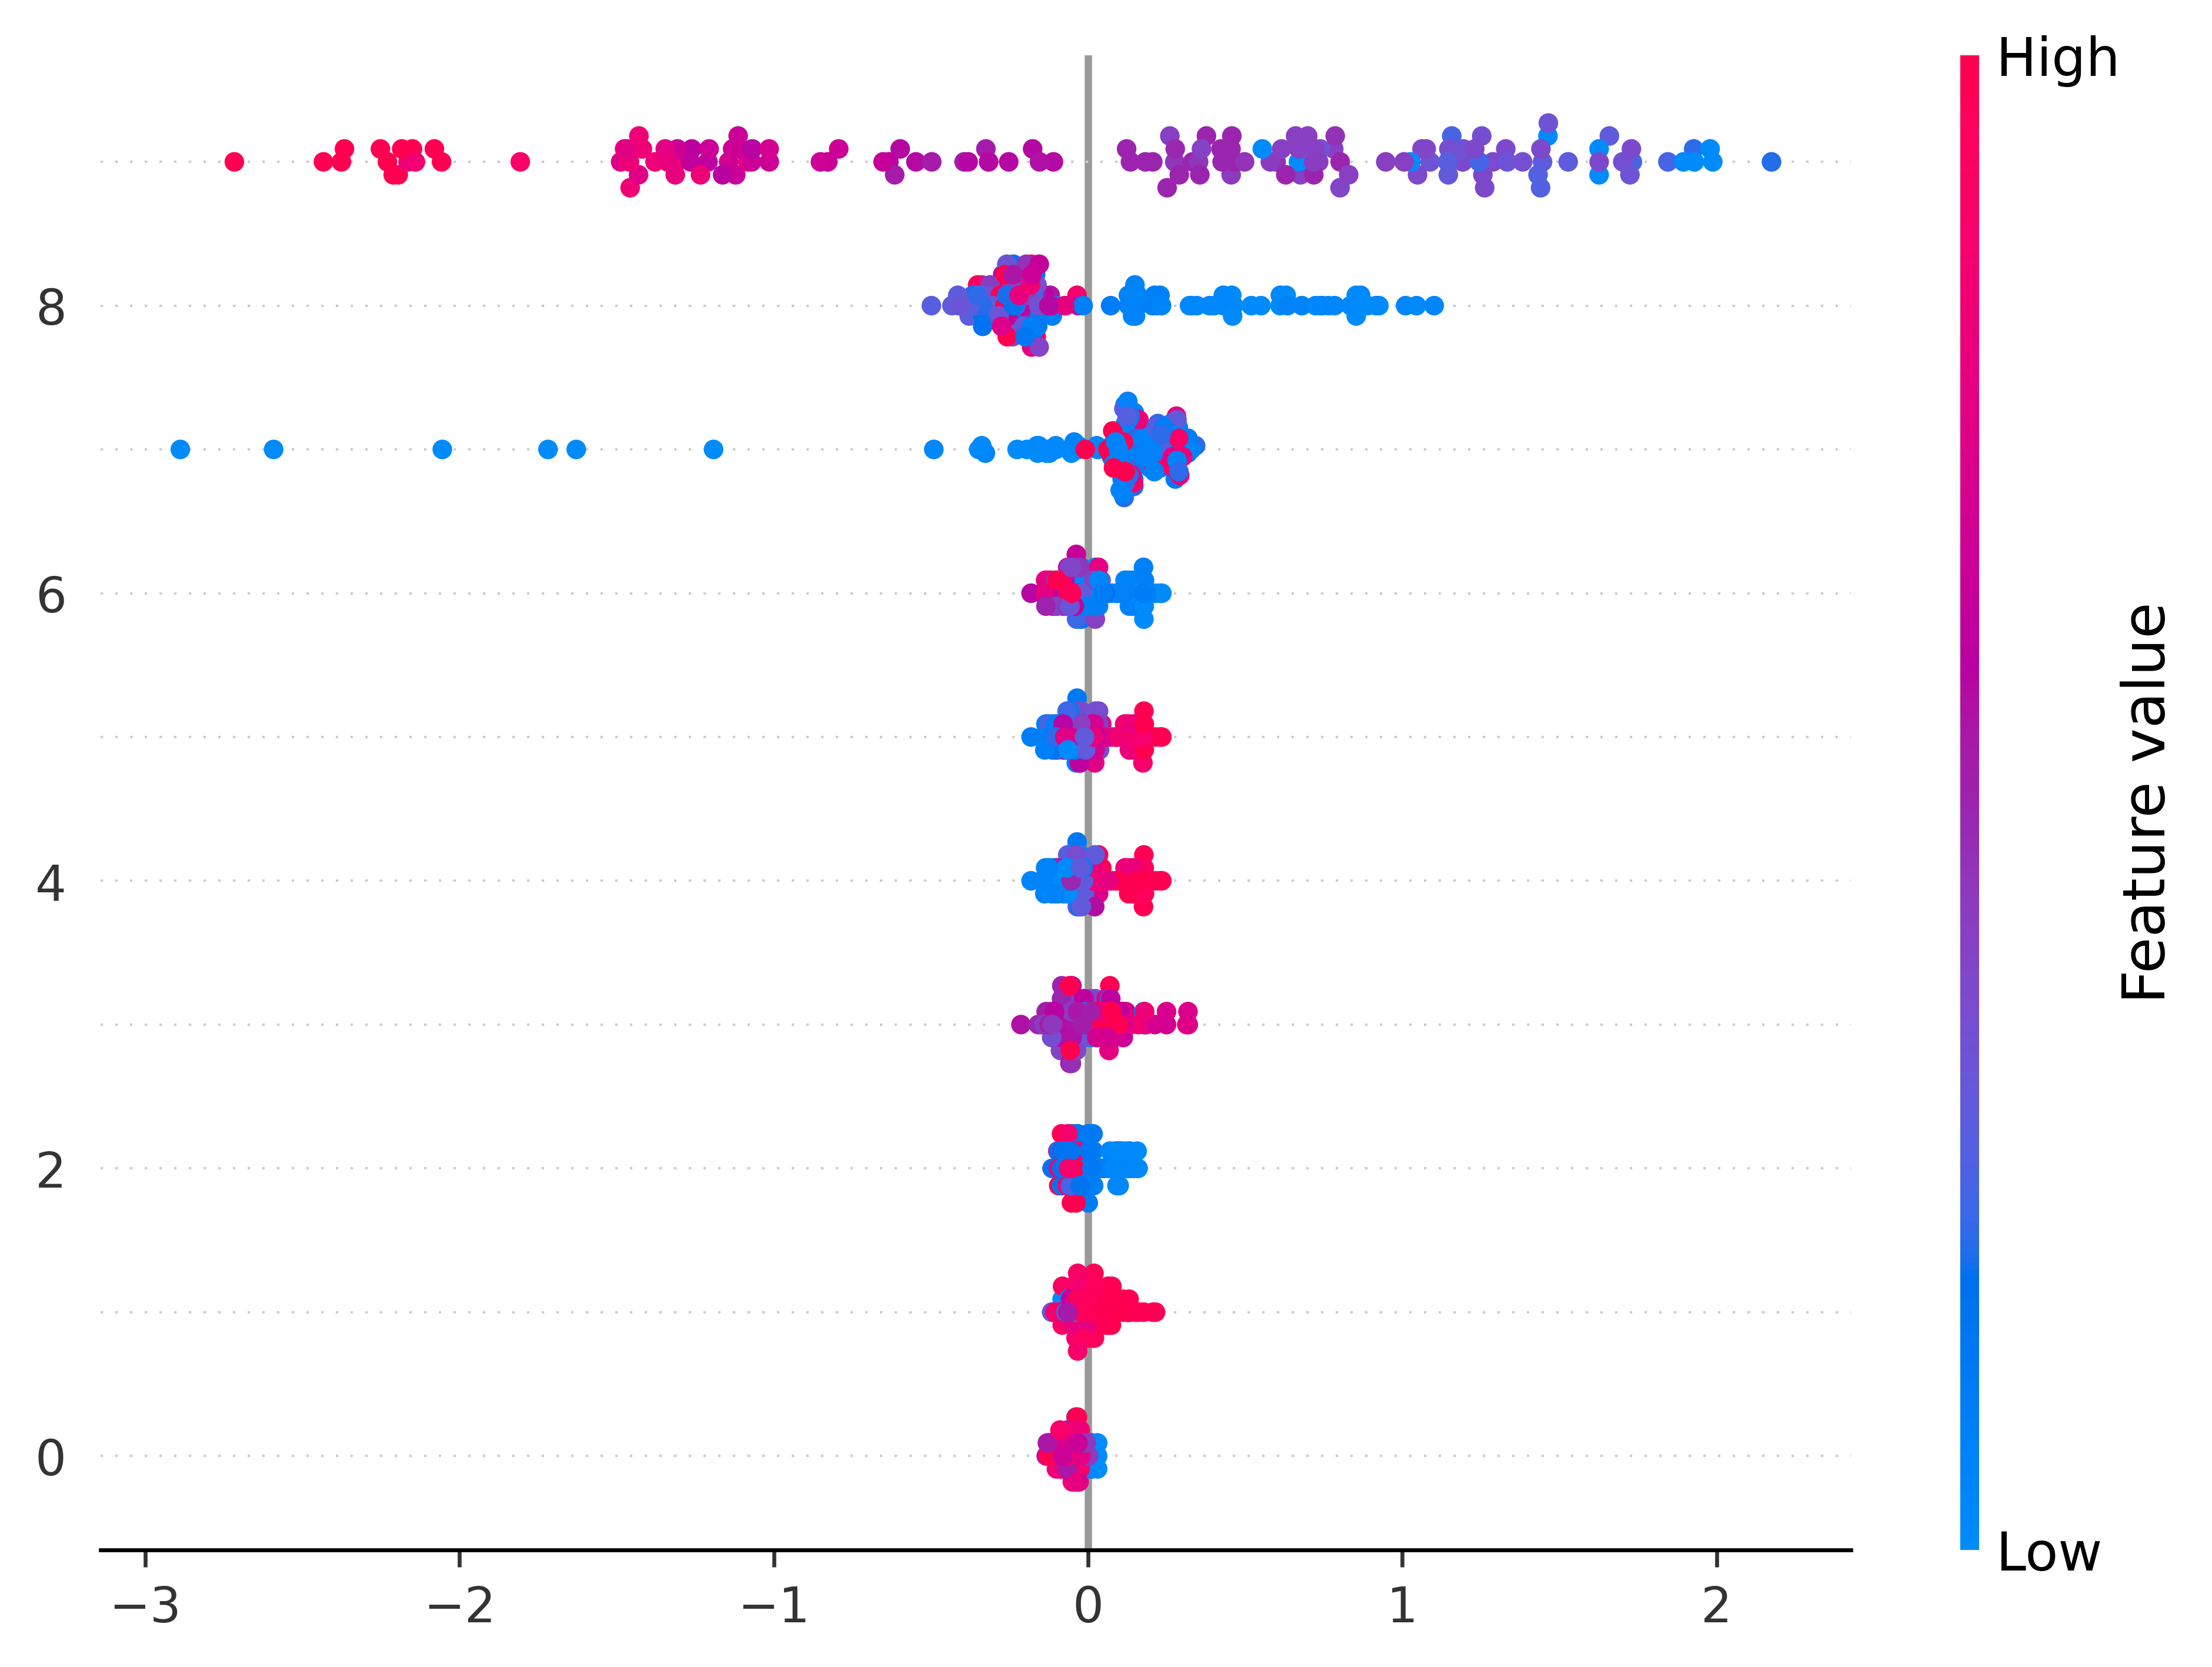

In [3]:
import numpy as np
import pandas as pd
import shap
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data
features = pd.read_excel('优化后数据.xlsx')
label1 = features['2Nf'].to_numpy()
label1 = label1 / 2
features = features.drop(['2Nf'], axis=1)
feature_names = features.columns  # Extract column names before conversion
features = MinMaxScaler().fit_transform(features)
label1 = np.log(label1)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, label1, test_size=0.25, random_state=42)

# Convert feature names to a list
feature_names_list = list(feature_names)

# Increase the weight of the 'T' feature
X_val_weighted = X_val.copy()  # Make a copy of the validation set

# Identify the index of the 'T' feature in the feature names list
t_feature_index = feature_names_list.index('T')

# Increase the values of the 'T' feature in the validation set
T_multiplier = 2  # Adjust this multiplier as needed
X_val_weighted[:, t_feature_index] *= T_multiplier

# Create the Random Forest model
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the weighted validation set
shap_values_weighted = explainer.shap_values(X_val_weighted)

# Modify feature names to include subscripts
feature_names_list_modified = []

for feature in feature_names_list:
    if feature == 'Δεt':
        feature_names_list_modified.append(r'$\Delta\epsilon_{t}$')
    elif feature == 'Δεe':
        feature_names_list_modified.append(r'$\Delta\epsilon_{e}$')
    elif feature == 'Δεp':
        feature_names_list_modified.append(r'$\Delta\epsilon_{p}$')
    else:
        feature_names_list_modified.append(feature)

# Calculate the weighted average SHAP values for 'UTS', 'YS', and 'EL'
uts_index = feature_names_list.index('UTS')
ys_index = feature_names_list.index('YS')
el_index = feature_names_list.index('EL')

# Combine SHAP values for 'UTS', 'YS', and 'EL' into one feature 'TP'
shap_values_weighted_tp = shap_values_weighted.copy()
shap_values_weighted_tp[:, [uts_index, ys_index, el_index]] = shap_values_weighted_tp[:, [uts_index, ys_index, el_index]].mean(axis=1, keepdims=True)

feature_names_list_modified_tp = []

for feature in feature_names_list_modified:
    if feature not in ['UTS', 'YS', 'EL']:
        feature_names_list_modified_tp.append(feature)

# Add 'TP' to the modified feature names list
feature_names_list_modified_tp.append('TP')
# Set DPI globally
plt.rcParams['figure.dpi'] = 600

# Create a summary plot for the weighted SHAP values with 'TP'
# Create a summary plot for the weighted SHAP values with 'TP'
weighted_summary_plot_tp = shap.summary_plot(shap_values_weighted_tp, X_val_weighted,
                                             feature_names=feature_names_list_modified_tp,
                                             show=False, plot_type='dot', max_display=10)


# Set plot properties for the weighted summary plot with 'TP'
plt.title('SHAP Values Summary Plot', fontsize=16, fontweight='bold', fontname='Times New Roman')
ax = plt.gca()
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16, fontweight=400, fontname='Times New Roman')
plt.xticks(np.arange(-3, 4, step=1), fontsize=10, fontweight='bold')
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(1)
plt.tick_params(axis='both', direction='in', length=5, width=1)
plt.rcParams["font.weight"] = "bold"
plt.grid(True, linestyle='--', alpha=0.6, linewidth=1.5)
plt.show()